# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys_laura import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[0:50]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city (STEP 1)
    city_url = f"{url}appid={ weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # city_weather = # YOUR CODE HERE
        
         # Step 2:
        response = requests.get(city_url)
        
        # Step 3: 
        status_code = response.status_code
        
        # Step 4: 
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {} # failed request

        # Step 5: Extraction
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("wind", {}).get("speed")
        city_date = city_weather.get("dt")
        city_pressure = city_weather.get("main", {}).get("pressure") 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Pressure": city_pressure,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        pass

    #sleep one sec
    time.sleep(1)
     
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | broome
Processing Record 2 of Set 1 | dryden
Processing Record 3 of Set 1 | atafu village
Processing Record 4 of Set 1 | sepuka
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | imbituba
Processing Record 7 of Set 1 | takoradi
Processing Record 8 of Set 1 | vadso
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | labrador city
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | choibalsan
Processing Record 14 of Set 1 | kenai
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | kirakira
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | steinkjer
Processing Record 22 of Set 1 | bethel
Processing Record 23 of Set 1 | de a

In [43]:
print(df.columns)

Index(['City_ID', 'City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Pressure',
       'Cloudiness', 'Wind Speed', 'Country', 'Date'],
      dtype='object')


In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          50
Lat           48
Lng           48
Max Temp      48
Humidity      48
Pressure      48
Cloudiness    48
Wind Speed    48
Country       48
Date          48
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
0,broome,42.2506,-75.8330,60.67,68.0,1020.0,95.0,0.94,0.94,1.717298e+09
1,dryden,49.7833,-92.7503,59.29,51.0,1009.0,0.0,5.75,5.75,1.717298e+09
2,atafu village,-8.5421,-172.5159,84.04,73.0,1009.0,20.0,5.10,5.10,1.717298e+09
3,sepuka,-4.7500,34.5333,60.08,81.0,1016.0,99.0,6.02,6.02,1.717298e+09
4,lompoc,34.6391,-120.4579,58.78,84.0,1014.0,0.0,13.80,13.80,1.717298e+09


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities_laura.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities_laura.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,broome,42.2506,-75.8330,60.67,68.0,1020.0,95.0,0.94,0.94,1.717298e+09
1,dryden,49.7833,-92.7503,59.29,51.0,1009.0,0.0,5.75,5.75,1.717298e+09
2,atafu village,-8.5421,-172.5159,84.04,73.0,1009.0,20.0,5.10,5.10,1.717298e+09
3,sepuka,-4.7500,34.5333,60.08,81.0,1016.0,99.0,6.02,6.02,1.717298e+09
4,lompoc,34.6391,-120.4579,58.78,84.0,1014.0,0.0,13.80,13.80,1.717298e+09


In [28]:
city_data_df.loc[pd.isnull(df.Lat)]

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
34,union choco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,taiohae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df = city_data_df.dropna(how="any").reset_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City_ID     48 non-null     int64  
 1   City        48 non-null     object 
 2   Lat         48 non-null     float64
 3   Lng         48 non-null     float64
 4   Max Temp    48 non-null     float64
 5   Humidity    48 non-null     float64
 6   Pressure    48 non-null     float64
 7   Cloudiness  48 non-null     float64
 8   Wind Speed  48 non-null     float64
 9   Country     48 non-null     float64
 10  Date        48 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 4.3+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

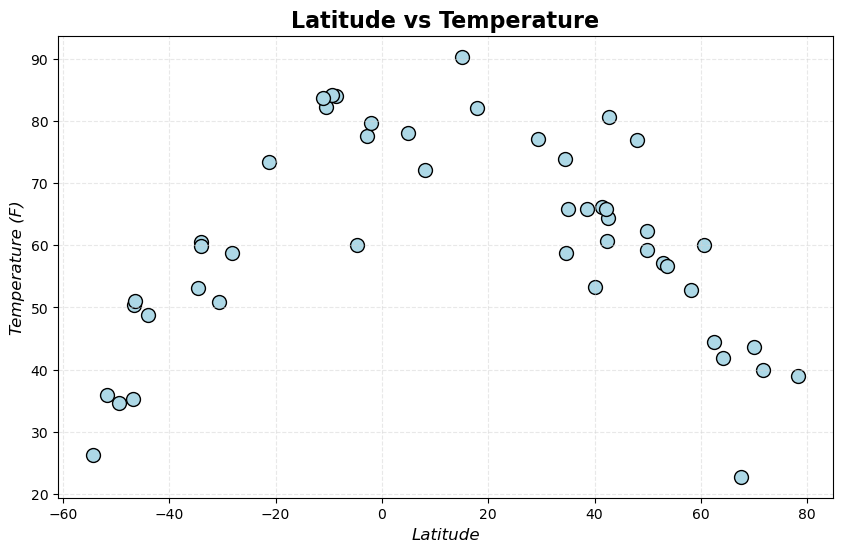

<Figure size 640x480 with 0 Axes>

In [98]:
# Build scatter plot for latitude vs. temperature

# Step 1: Get the Data
x = df.Lat
y = df['Max Temp']

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="lightblue", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="oblique")
plt.ylabel("Temperature (F)", fontsize=12, fontstyle="oblique")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.show()

# Save the figure
plt.savefig("../output_data/Fig1_laura.png")
plt.show()


#### Latitude Vs. Humidity

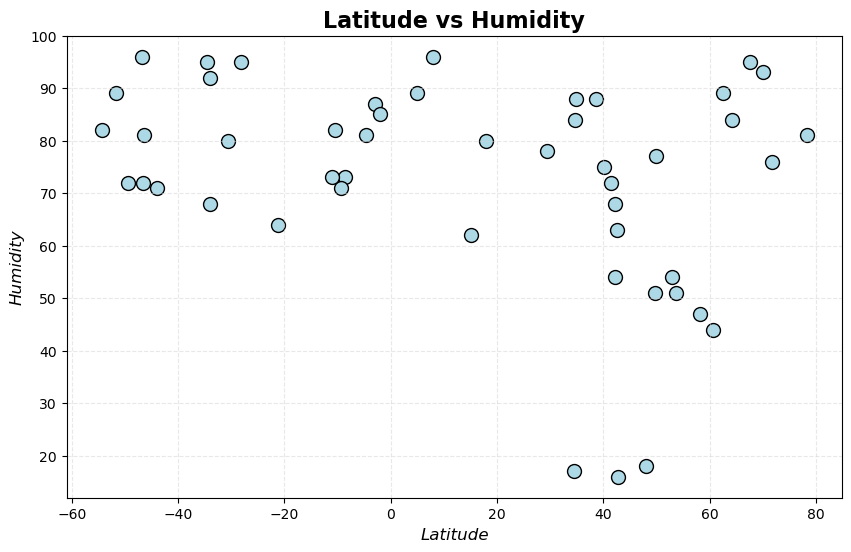

<Figure size 640x480 with 0 Axes>

In [99]:
# Step 1: Get the Data
x = df.Lat
y = df.Humidity

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="lightblue", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.show()


# Save the figure
plt.savefig("../output_data/Fig2_laura.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

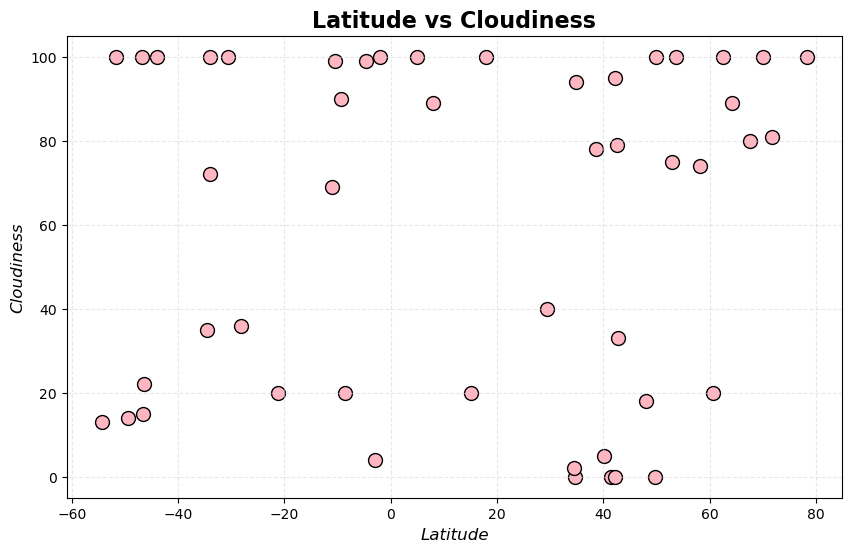

<Figure size 640x480 with 0 Axes>

In [100]:
# Build the scatter plots for latitude vs. cloudiness
# Step 1: Get the Data
x = df.Lat
y = df.Cloudiness

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="lightpink", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.show()

# Show plot
plt.show()
# Save the figure
plt.savefig("../output_data/Fig3_laura.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

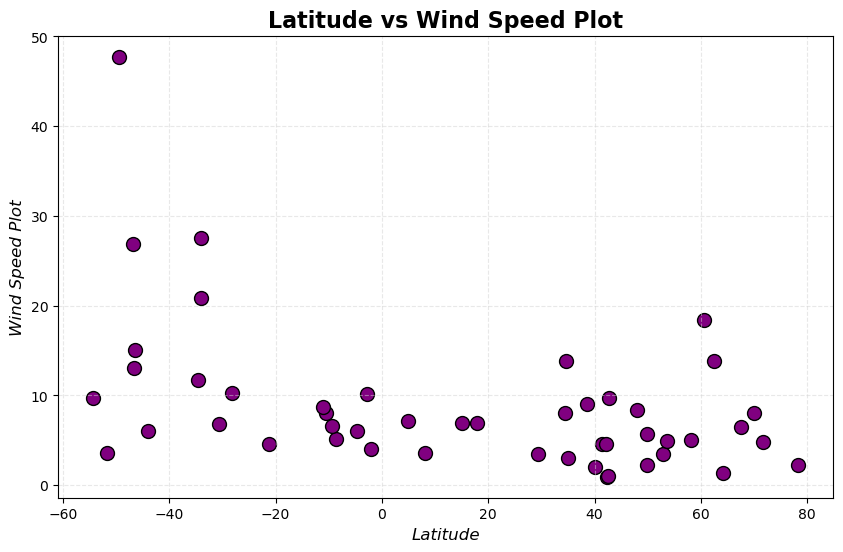

<Figure size 640x480 with 0 Axes>

In [103]:
# Build the scatter plots for latitude vs. wind speed
# Step 1: Get the Data
x = df.Lat
y = df['Wind Speed']

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="purple", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed Plot", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Wind Speed Plot", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.show()

# Save the figure
plt.savefig("../output_data/Fig4_laura.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots

def doRegression(x_value, y_values, x_title, y_title, annotation_pos):
# USING LINREGRESS

    # makes the line of best fit
   (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
   regress_values = x_values * slope + intercept # calculate the predictions
   line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

   # make the plot
   # Step 2: Make the canvas
   plt.figure(figsize=(10, 6))

   # Step 3: Make the basic plot
   plt.scatter(x_values, y_values, facecolor="firebrick", edgecolor="black", s=100)
   plt.plot(x_values, regress_values, "r-") # plot the line of best fit

   # Step 4: Customizations
   plt.xlabel(x_title, fontsize=12, fontstyle="italic")
   plt.ylabel(y_title, fontsize=12, fontstyle="italic")
   plt.title(f"{x_title} vs {y_title}", fontweight="bold", fontsize=16)
   plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

   plt.annotate(line_eq,annotation_pos,fontsize=16,color="purple")

   print(f"The r-squared is: {rvalue**2}")
   plt.show()

In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df.loc[df.Lat >=0]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
0,0,broome,42.2506,-75.8330,60.67,68.0,1020.0,95.0,0.94,0.94,1.717298e+09
1,1,dryden,49.7833,-92.7503,59.29,51.0,1009.0,0.0,5.75,5.75,1.717298e+09
4,4,lompoc,34.6391,-120.4579,58.78,84.0,1014.0,0.0,13.80,13.80,1.717298e+09
6,6,takoradi,4.8845,-1.7554,78.01,89.0,1013.0,100.0,7.16,7.16,1.717298e+09
7,7,vadso,70.0744,29.7487,43.68,93.0,1018.0,100.0,8.05,8.05,1.717298e+09


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df.loc[df.Lat <=0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
2,2,atafu village,-8.5421,-172.5159,84.04,73.0,1009.0,20.0,5.10,5.10,1.717298e+09
3,3,sepuka,-4.7500,34.5333,60.08,81.0,1016.0,99.0,6.02,6.02,1.717298e+09
5,5,imbituba,-28.2400,-48.6703,58.75,95.0,1021.0,36.0,10.31,10.31,1.717298e+09
11,11,margaret river,-33.9500,115.0667,60.57,68.0,1007.0,72.0,20.89,20.89,1.717298e+09
14,14,papatowai,-46.5619,169.4708,50.40,72.0,1021.0,15.0,13.04,13.04,1.717298e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6787155876838842


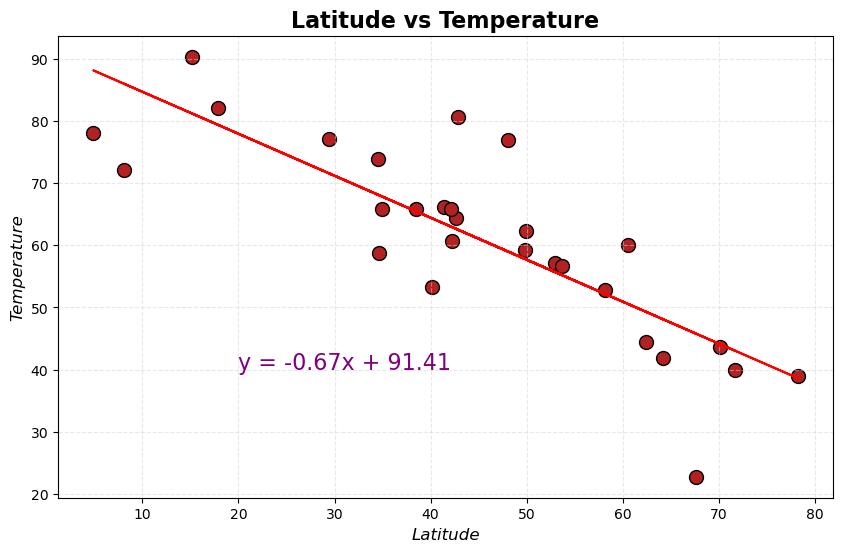

In [59]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]

doRegression(x_values, y_values, "Latitude", "Temperature", (20,40))

The r-squared is: 0.8197615815930172


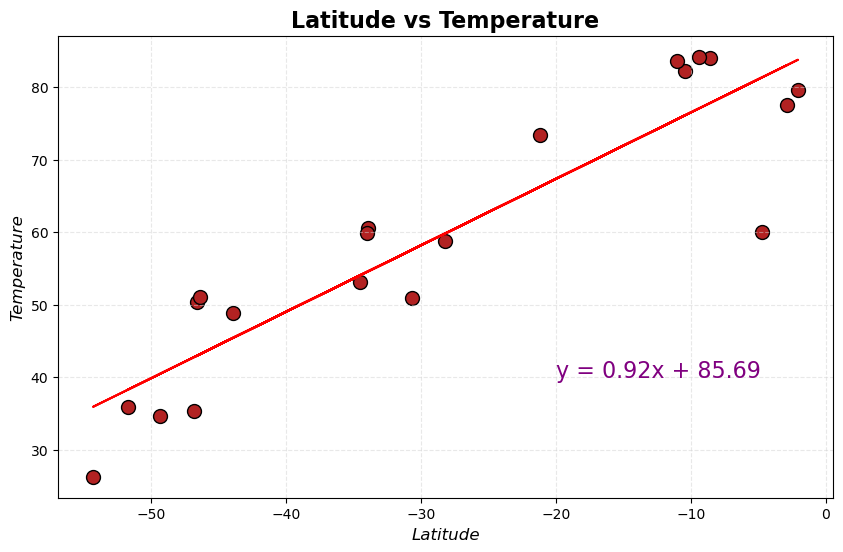

In [61]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]

doRegression(x_values, y_values, "Latitude", "Temperature", (-20,40))

**Discussion about the linear relationship:** There is a  difference in the linear regression between the southern hemisphere and north but still i believe is not a significative change in the r square for both of them.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0022796176666929117


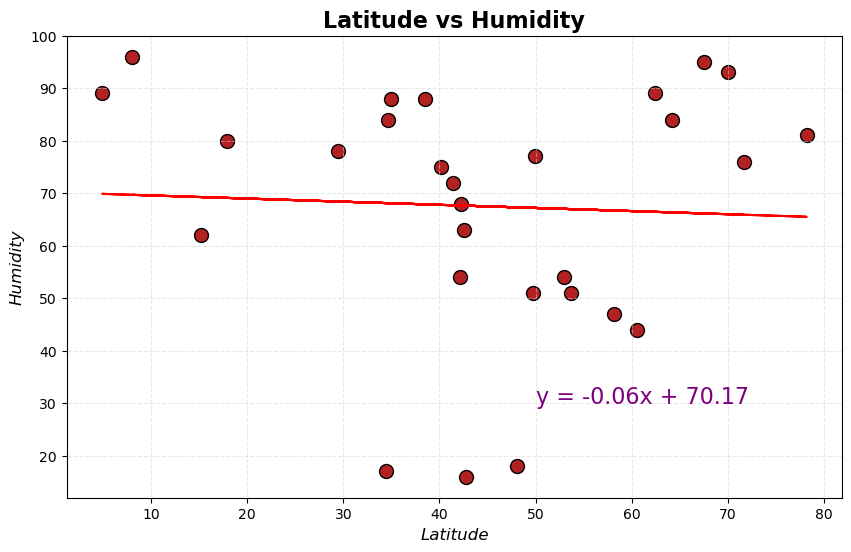

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]

doRegression(x_values, y_values, "Latitude", "Humidity", (50,30))

The r-squared is: 0.01315470497984298


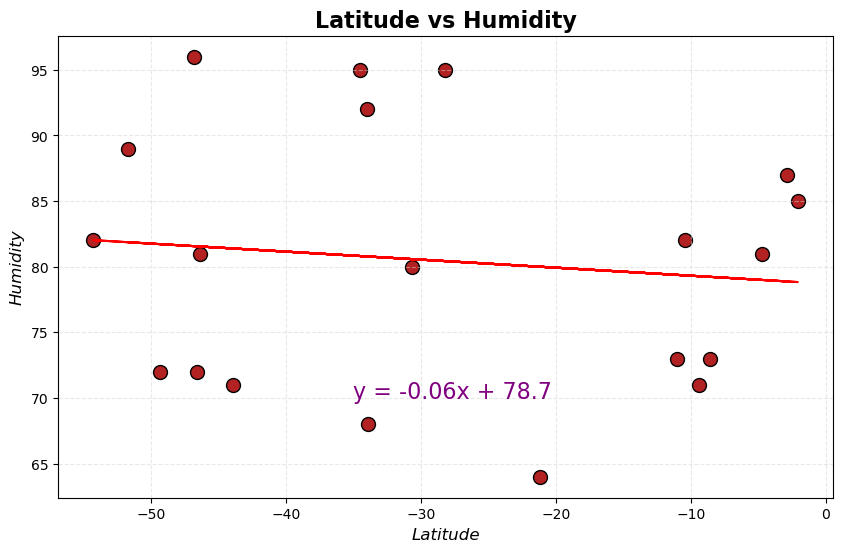

In [79]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]
doRegression(x_values, y_values, "Latitude", "Humidity", (-35,70))

**Discussion about the linear relationship:** There is a linear relationship between the two of them. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.029201501580358967


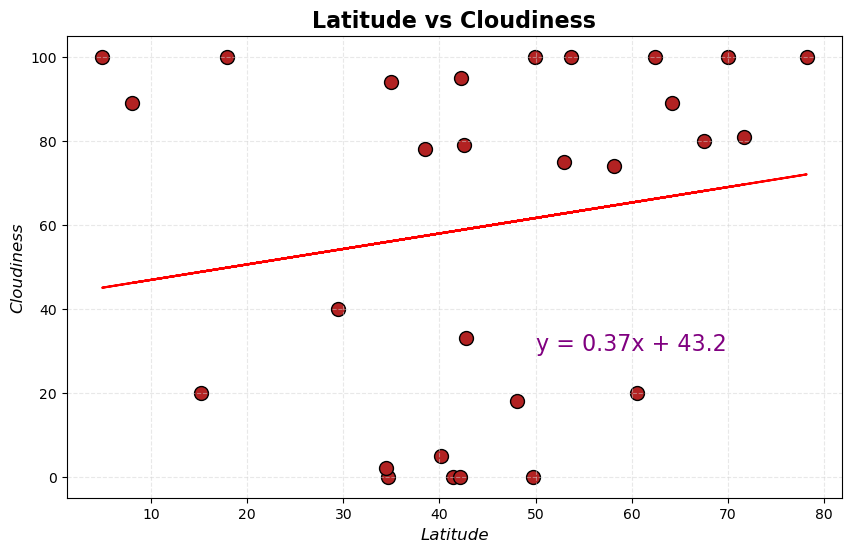

In [80]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Cloudiness

doRegression(x_values, y_values, "Latitude", "Cloudiness", (50,30))

The r-squared is: 0.022871662759987317


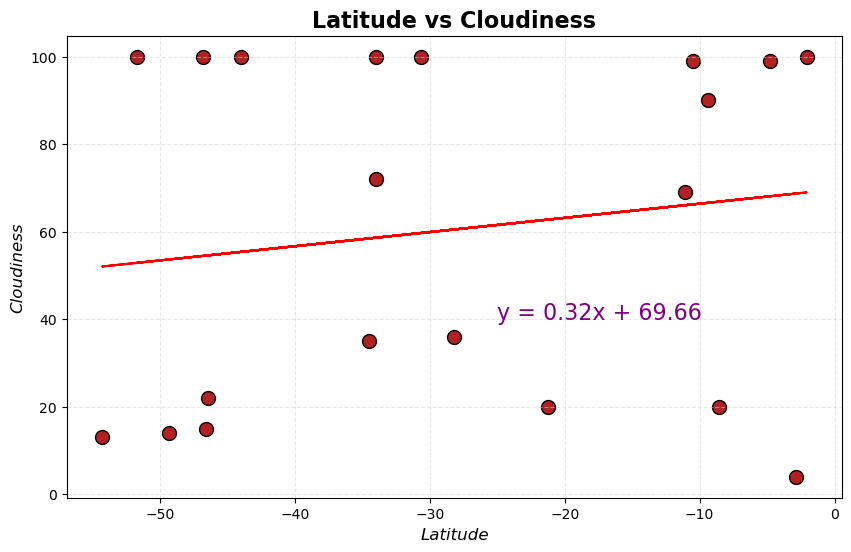

In [86]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df.Cloudiness

doRegression(x_values, y_values, "Latitude", "Cloudiness", (-25,40))

**Discussion about the linear relationship:** There is a slighly difference in the linear regression between the two of them but still i believe is not a significative change.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.001372526603037092


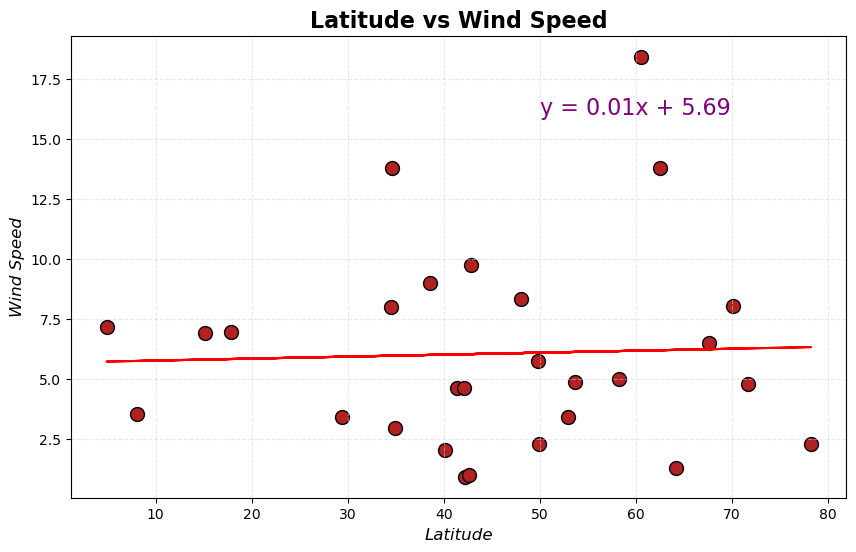

In [94]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df['Wind Speed']

doRegression(x_values, y_values, "Latitude", "Wind Speed", (50,16))

The r-squared is: 0.20306779041997763


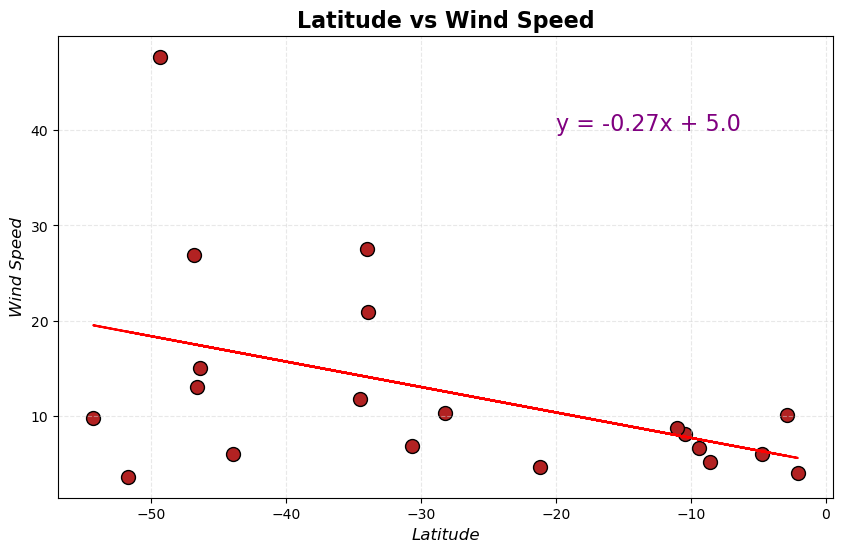

In [95]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df['Wind Speed']

doRegression(x_values, y_values, "Latitude", "Wind Speed", (-20,40))

**Discussion about the linear relationship:** There is no relationship between the both of them.